# 1. Production about topic: Car Classifition Dataset

## Lịch sử và Nguồn gốc

### Tác giả 

Dữ liệu đánh giá xe hơi được tạo bởi Marko Bohanec.

### Ngày tạo

 Dữ liệu này được tạo vào ngày 31 tháng 5 năm 1997.

### Nguồn gốc 

Dữ liệu này bắt nguồn từ một mô hình quyết định phân cấp. Mô hình này ban đầu được phát triển để trình diễn cho hệ thống DEX, một hệ thống chuyên gia hỗ trợ ra quyết định. Mô hình đánh giá sự chấp nhận của xe hơi dựa trên các yếu tố giá cả, kỹ thuật, và độ an toàn.

source link: https://archive.ics.uci.edu/dataset/19/car+evaluation

## Công dụng

Nghiên cứu học máy: Dữ liệu này thường được sử dụng trong các nghiên cứu học máy để kiểm tra và đánh giá các phương pháp xây dựng mô hình phân cấp và phát hiện cấu trúc.


Phát triển công cụ: Dữ liệu đã được sử dụng trong quá trình phát triển công cụ HINT (Hierarchy INduction Tool) và được so sánh với thuật toán C4.5 để kiểm tra hiệu quả.

Giáo dục: Dữ liệu này còn được sử dụng trong các khóa học và bài giảng về học máy và phân tích dữ liệu, giúp sinh viên và người học hiểu rõ hơn về cách thức xây dựng và kiểm tra mô hình phân loại.

## Danh sách các Đặc trưng

buying: Giá mua xe (các giá trị có thể: v-high, high, med, low)

maint: Chi phí bảo trì (các giá trị có thể: v-high, high, med, low)

doors: Số lượng cửa xe (các giá trị có thể: 2, 3, 4, 5-more)

persons: Sức chứa của xe (các giá trị có thể: 2, 4, more)

lug_boot: Kích thước cốp xe (các giá trị có thể: small, med, big)

safety: Độ an toàn của xe (các giá trị có thể: low, med, high)

## Kiểu dữ liệu

Tất cả các đặc trưng đều là kiểu phân loại (categorical), với các giá trị định trước cho từng đặc trưng.

## Mục đích

Hỗ trợ đánh giá và lựa chọn xe hơi: Dữ liệu này được thu thập nhằm hỗ trợ việc đánh giá và lựa chọn xe hơi dựa trên nhiều yếu tố khác nhau, từ đó giúp người dùng và nhà sản xuất hiểu rõ hơn về các yếu tố ảnh hưởng đến sự chấp nhận của xe.

Phát triển mô hình phân loại: Dữ liệu này giúp phát triển và kiểm tra các mô hình phân loại trong học máy.

## Lĩnh vực

Dữ liệu thuộc lĩnh vực hệ thống hỗ trợ quyết định và học máy, và có thể ứng dụng vào các hệ thống hỗ trợ mua sắm xe hơi, đánh giá sản phẩm, và các nghiên cứu liên quan đến phân tích dữ liệu.

## Hạn chế

Thiếu thông tin chi tiết về cấu trúc và cách tính điểm: Dữ liệu này không bao gồm các thông tin chi tiết về cấu trúc và cách tính điểm của các đặc trưng trung gian, như PRICE và TECH. Điều này giới hạn khả năng phân tích sâu hơn về cấu trúc ẩn của mô hình và có thể làm khó khăn trong việc xác định rõ ràng các yếu tố quyết định điểm số.

## Khiếm khuyết

Giá trị thiếu: Mặc dù dữ liệu này không chứa các giá trị thiếu (tất cả các mục dữ liệu đều được cung cấp), nhưng việc các đặc trưng chỉ là các nhãn phân loại có thể làm giảm độ chính xác trong việc phân tích và mô hình hóa chi tiết. Các mô hình phân loại có thể không nắm bắt được các mối quan hệ phức tạp giữa các đặc trưng. 

# 2. Thực hiện xử lí dữ liệu

## Importing library

In [11]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_CRUD import DataProcessing
from data_cleaning import count_duplicate_rows,remove_duplicate_rows,count_null_values,remove_null_values,sort_data
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning) #bỏ qua các dòng warning


## Đọc dữ liệu và chuẩn bị cho các thao tác với data set

In [15]:
dp = DataProcessing('cars.csv')

## Printing the dataset

In [6]:
print(pd.DataFrame(dp.data))


           0      1      2        3         4       5      6
0     buying  maint  doors  persons  lug_boot  safety  class
1      vhigh  vhigh      2        2     small     low  unacc
2      vhigh  vhigh      2        2     small     med  unacc
3      vhigh  vhigh      2        2     small    high  unacc
4      vhigh  vhigh      2        2       med     low  unacc
...      ...    ...    ...      ...       ...     ...    ...
1726     low    low  5more     more       big     low  unacc
1727     low    low  5more     more       big     med   good
1728     low    low  5more     more       big    high  vgood
1729   vhigh  vhigh      2        2     small     low  unacc
1730   vhigh  vhigh      2        2     small     low  unacc

[1731 rows x 7 columns]


## Adding colomns headers


“buying” : buying price

“maint” : price of the maintenance

“doors” : number of doors

“persons” : capacity in terms of persons to carry

“lug_boot” : the size of luggage boot

“safety” : estimated safety of the car

“class” : evaulation level (unacceptable, acceptable, good, very good)

In [16]:
data = dp.load_data()
column_names=["buying","maint","doors", "persons", "lug_boot", "safety", "class"]
data = pd.DataFrame(data, columns=column_names)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,buying,maint,doors,persons,lug_boot,safety,class
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc
...,...,...,...,...,...,...,...
1726,low,low,5more,more,big,low,unacc
1727,low,low,5more,more,big,med,good
1728,low,low,5more,more,big,high,vgood
1729,vhigh,vhigh,2,2,small,low,unacc


## Saving the dataset

In [8]:
dp.save_data()

Dữ liệu đã được lưu thành công.


## Add new record

In [ ]:
new_record = input("Nhập bản ghi mới (các trường cách nhau bởi dấu phẩy): ")
new_record = new_record.split(',')
if len(new_record) ==  len(dp.get_sample_record()):
    dp.add_record(new_record)
else:
    print(f"Số lượng trường không hợp lệ. Mong đợi {len(dp.get_sample_record())} trường.")

## Updating dataset

In [ ]:
index = int(input("Nhập vị trí cần cập nhật: "))
if 0 <= index < len(dp.data):
    updated_record = input("Nhập bản ghi mới (các trường cách nhau bởi dấu phẩy): ").split(',')
    dp.update_record(index, updated_record)
else:
    print("Vị trí không hợp lệ. Vui lòng nhập lại.")


Bản ghi đã được cập nhật.


## Detele the dataset

In [ ]:
index = int(input("Nhập vị trí cần xóa: "))
if 0 <= index < len(dp.data):
    dp.delete_record(index)
else:
      print("Vị trí không hợp lệ. Vui lòng nhập lại.")

Bản ghi đã được xóa.


## Làm sạch dataset

### Hàm : Hàm đếm số lượng hàng trùng lặp

In [10]:
count_duplicate_rows(data)


Số lượng các hàng trùng lặp: 3
Các hàng trùng lặp:
     buying  maint doors persons lug_boot safety  class
1     vhigh  vhigh     2       2    small    low  unacc
1729  vhigh  vhigh     2       2    small    low  unacc
1730  vhigh  vhigh     2       2    small    low  unacc


### Hàm : Loại bỏ giá trị trùng lặp

In [13]:
modified_data = remove_duplicate_rows(data)


Dữ liệu sau khi loại bỏ các hàng trùng lặp:
      buying  maint  doors  persons  lug_boot  safety  class
0     buying  maint  doors  persons  lug_boot  safety  class
1      vhigh  vhigh      2        2     small     low  unacc
2      vhigh  vhigh      2        2     small     med  unacc
3      vhigh  vhigh      2        2     small    high  unacc
4      vhigh  vhigh      2        2       med     low  unacc
...      ...    ...    ...      ...       ...     ...    ...
1724     low    low  5more     more       med     med   good
1725     low    low  5more     more       med    high  vgood
1726     low    low  5more     more       big     low  unacc
1727     low    low  5more     more       big     med   good
1728     low    low  5more     more       big    high  vgood

[1729 rows x 7 columns]


 ### Hàm : Đếm số lượng giá trị NULL trong mỗi cột

In [17]:
count_null_values(modified_data)


Đếm số lượng giá trị NULL trong mỗi cột:
Cột 'buying': 0 giá trị NULL
Cột 'maint': 0 giá trị NULL
Cột 'doors': 0 giá trị NULL
Cột 'persons': 0 giá trị NULL
Cột 'lug_boot': 0 giá trị NULL
Cột 'safety': 0 giá trị NULL
Cột 'class': 0 giá trị NULL

Danh sách các hàng có giá trị NULL:
Empty DataFrame
Columns: [buying, maint, doors, persons, lug_boot, safety, class]
Index: []


### Loại bỏ các hàng chứa giá trị NULL

In [18]:
data_cleaned = remove_null_values(modified_data)

Đã loại bỏ các hàng chứa giá trị NULL (NaN).


### Hàm :để sắp xếp dữ liệu theo cột cụ thể

In [19]:
sort_columns = ['buying', 'class']
sorted_data = sort_data(data_cleaned, sort_columns)
print("Dữ liệu sau khi sắp xếp:")
print(sorted_data)

Dữ liệu sau khi sắp xếp:
     buying  maint  doors  persons  lug_boot  safety  class
0    buying  maint  doors  persons  lug_boot  safety  class
552    high   high      2        4     small    high    acc
555    high   high      2        4       med    high    acc
557    high   high      2        4       big     med    acc
558    high   high      2        4       big    high    acc
..      ...    ...    ...      ...       ...     ...    ...
421   vhigh    low  5more        4       big     low  unacc
424   vhigh    low  5more     more     small     low  unacc
425   vhigh    low  5more     more     small     med  unacc
427   vhigh    low  5more     more       med     low  unacc
430   vhigh    low  5more     more       big     low  unacc

[1729 rows x 7 columns]


##Mã hóa và chuẩn hóa dữ liệu

### Biểu đồ phân phối của các biến phân loại


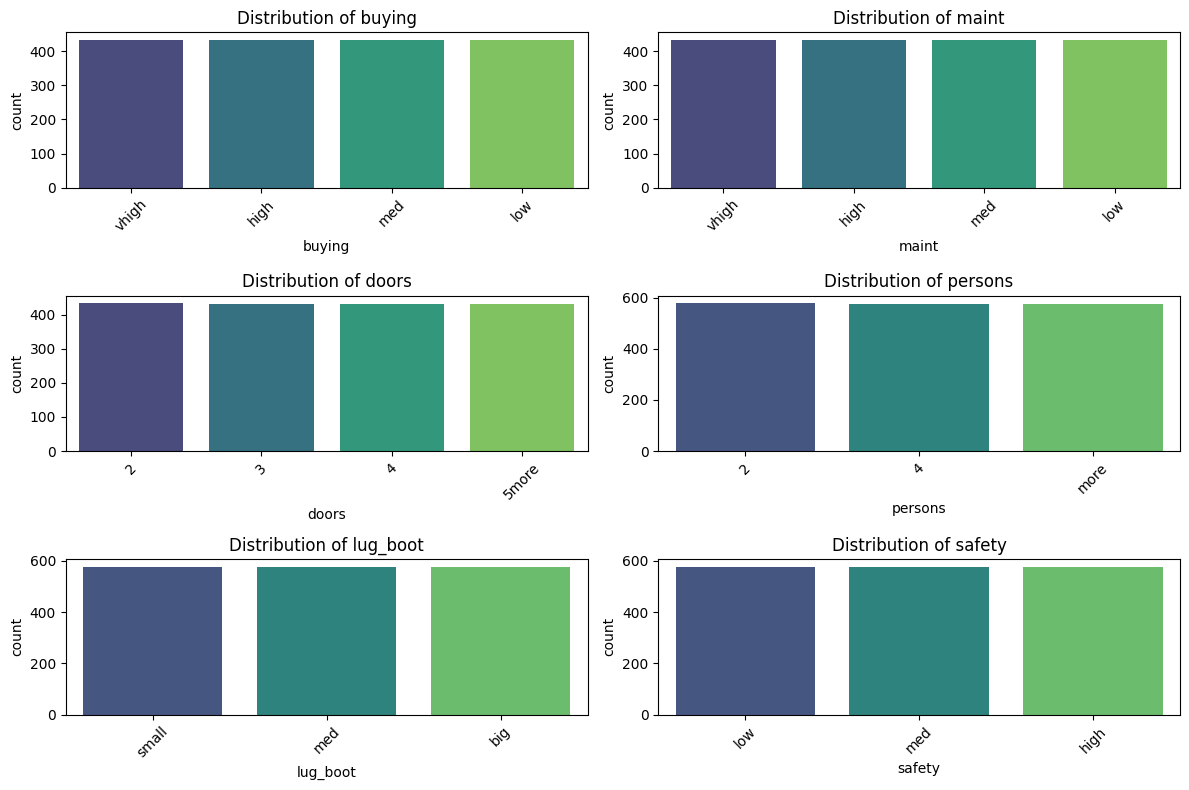

In [ ]:
df = pd.read_csv('cars.csv')
categorical_columns = df.columns[:-1] 
plt.figure(figsize=(12, 8)) 
for i, column in enumerate(categorical_columns, 1): 
    plt.subplot(3, 2, i) 
    sns.countplot(x=column, data=df, palette='viridis') 
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### Biểu đồ phân phối của các biến phân loại theo biến target


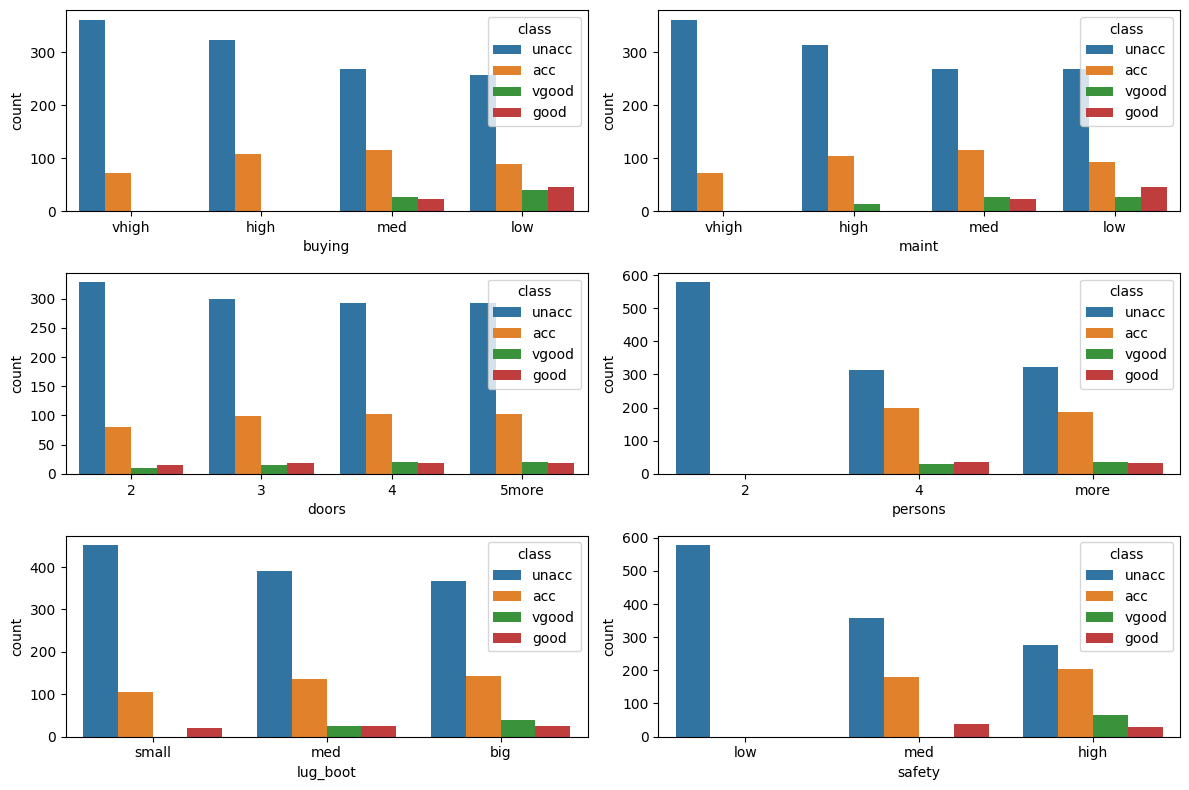

In [ ]:
plt.figure(figsize=(12,8))
for i, col in enumerate(categorical_columns): #duyệt qua các cột
    plt.subplot(3, 2, i+1) #vẽ biểu đồ ở hàng 3, cột 2, vị trí
    sns.countplot(data=df,x=col,hue='class') #vẽ biểu đồ bằng seaborn
plt.tight_layout() #để tránh trùng lắp giữa các biểu đồ
plt.show()


### Biểu đồ nhiệt tương quan giữa chi phí mua và độ an toàn của xe


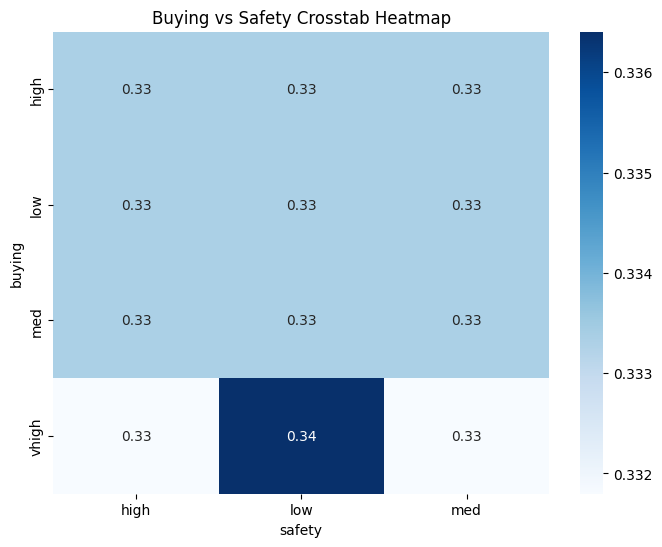

In [29]:
interaction_crosstab = pd.crosstab(df['buying'], df['safety'], normalize='index')
plt.figure(figsize=(8,6))
sns.heatmap(interaction_crosstab, annot=True, cmap='Blues', fmt='.2f')
plt.title('Buying vs Safety Crosstab Heatmap')
plt.show()

### Biểu đồ phân tán chi phí mua và chi phí bảo trì theo loại xe

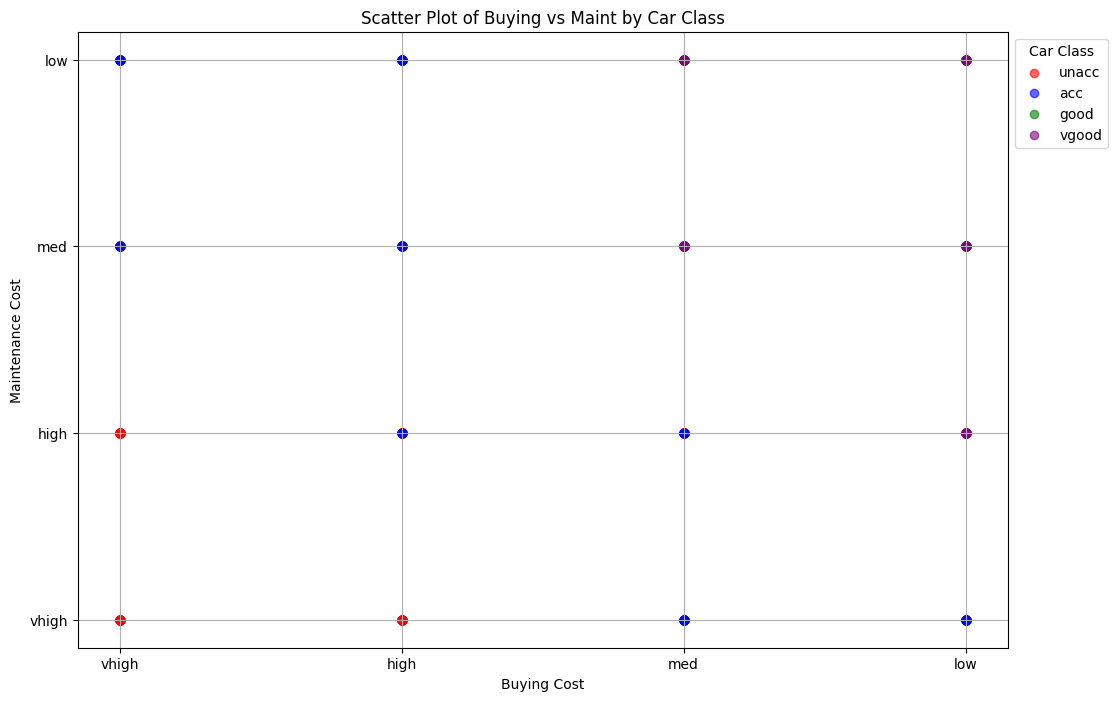

In [24]:
scatter_colors = {'unacc': 'red', 'acc': 'blue', 'good': 'green', 'vgood': 'purple'}
plt.figure(figsize=(12, 8))
for category, color in scatter_colors.items():
    subset = data[data['class'] == category]
    plt.scatter(subset['buying'], subset['maint'], label=category, alpha=0.6, color=color)
plt.title("Scatter Plot of Buying vs Maint by Car Class")
plt.xlabel("Buying Cost")
plt.ylabel("Maintenance Cost")
plt.legend(title='Car Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()